#  <span style="color:rebeccapurple">SPACE LAUNCH</span>
<span style="color:orchid">**2024 Tidytuesday  Week 17** </span>

##  Setup

### libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [250]:
from matplotlib import rcParams
from matplotlib import font_manager

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [251]:
font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

In [253]:
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

rcParams['font.family'] = 'Roboto'

### Data

In [6]:
data_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-23/outer_space_objects.csv"
dd = pd.read_csv(data_url)
dd.head()

,Entity,Code,Year,num_objects
0,APSCO,NaN,2023,1
1,Algeria,DZA,2002,1
2,Algeria,DZA,2010,1
3,Algeria,DZA,2016,3
4,Algeria,DZA,2017,1


Drop missing

In [13]:
ddc = dd.dropna()
ddc.head(3)

,Entity,Code,Year,num_objects
1,Algeria,DZA,2002,1
2,Algeria,DZA,2010,1
3,Algeria,DZA,2016,3


Drop entity that is not country

In [16]:
ddd =  ddc[ddc.Code != 'OWID_WRL']
ddd.head(3)

,Entity,Code,Year,num_objects
1,Algeria,DZA,2002,1
2,Algeria,DZA,2010,1
3,Algeria,DZA,2016,3


Select columns and pivot wide

In [32]:
country_df = ddd[['Code', 'Year', 'num_objects']].rename(columns={'Code':'code', 'Year':'year', 'num_objects':'total'})
df_wide = country_df.pivot(index='year', columns='code', values='total')
df_wide.head(3)


code,AGO,ARE,ARG,ARM,AUS,AUT,AZE,BEL,BGD,BGR,...,TUR,TWN,UGA,UKR,URY,USA,VEN,VNM,ZAF,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN


Fill NaN with zeros

In [156]:
df_filled = df_wide.fillna(0)
df_filled.head()

code,AGO,ARE,ARG,ARM,AUS,AUT,AZE,BEL,BGD,BGR,...,TUR,TWN,UGA,UKR,URY,USA,VEN,VNM,ZAF,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
1959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0


Cummulative sum (colwise)

In [166]:
df_cumsum = df_filled.cumsum()
df_cumsum.tail()

code,AGO,ARE,ARG,ARM,AUS,AUT,AZE,BEL,BGD,BGR,...,TUR,TWN,UGA,UKR,URY,USA,VEN,VNM,ZAF,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2019,1.0,10.0,18.0,0.0,26.0,3.0,3.0,32.0,2.0,2.0,...,13.0,15.0,0.0,8.0,6.0,3311.0,4.0,6.0,5.0,0.0
2020,1.0,13.0,19.0,0.0,29.0,3.0,3.0,35.0,2.0,2.0,...,13.0,15.0,0.0,8.0,19.0,4295.0,4.0,6.0,5.0,0.0
2021,1.0,17.0,20.0,0.0,37.0,3.0,3.0,36.0,2.0,3.0,...,16.0,17.0,0.0,8.0,23.0,5527.0,4.0,6.0,5.0,0.0
2022,2.0,20.0,21.0,1.0,37.0,3.0,3.0,36.0,2.0,4.0,...,18.0,19.0,1.0,9.0,32.0,7466.0,4.0,6.0,8.0,1.0
2023,2.0,22.0,22.0,1.0,47.0,3.0,3.0,39.0,2.0,4.0,...,22.0,21.0,1.0,10.0,40.0,9632.0,4.0,6.0,9.0,1.0


In [171]:
df_cumsum.loc[2023].sort_values(ascending=False).head(10)

code
USA    9632.0
RUS    3723.0
CHN    1051.0
GBR     765.0
JPN     325.0
FRA     151.0
IND     144.0
DEU     120.0
CAN     102.0
LUX      86.0
Name: 2023, dtype: float64

## Matplotlib: step-by-step prep

Tutorials links:

 - [racing bars](https://www.dunderdata.com/blog/create-a-bar-chart-race-animation-in-python-with-matplotlib)
 - [vid1](https://www.youtube.com/watch?v=lZNNmaWkiMI&t=692s)
 - [vid2](https://www.youtube.com/watch?v=5faHSJKlS_g&t=6s)

Basic bar chart

In [183]:
df_selected = df_cumsum[['USA', 'FRA', 'RUS', 'JPN', 'GBR', 'IND', 'CHN', 'CAN', 'LUX', 'DEU']]
dfs = df_selected.loc[2000].sort_values()

colors = plt.cm.Dark2(range(10))
tableau10 = ['#5778a4', '#e49444', '#d1615d', '#85b6b2', '#6a9f58', '#e7ca60', '#a87c9f', '#f1a2a9', '#967662', '#b8b0ac']

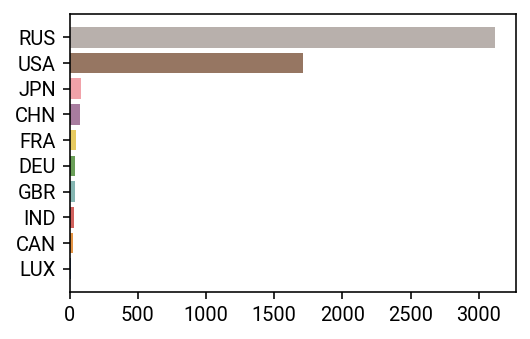

In [254]:
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)

y = dfs.index
width = dfs.values
ax.barh(y=y, width=width, color=tableau10);

Theme module

In [116]:
def nice_axes(ax):
    ax.set_facecolor('.9')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

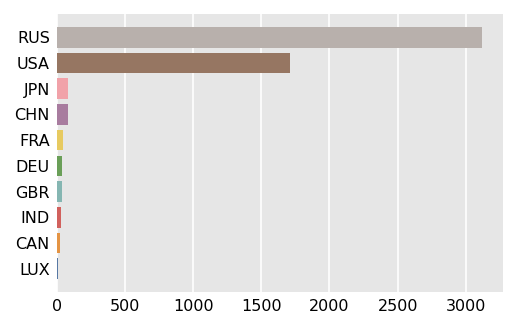

In [185]:
nice_axes(ax)
fig

Facetted bar chart

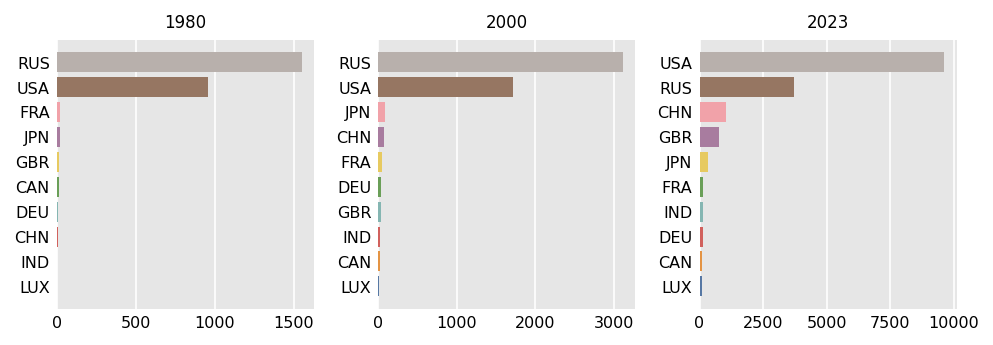

In [187]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)

years = [1980, 2000, 2023]
for ax, year in zip(ax_array, years):
    dfss = df_selected.loc[year].sort_values()
    ax.barh(y=dfss.index, width=dfss.values, color=tableau10)
    ax.set_title(year, fontsize='smaller')
    nice_axes(ax)

Ranking (not sorting) to match colors with countries

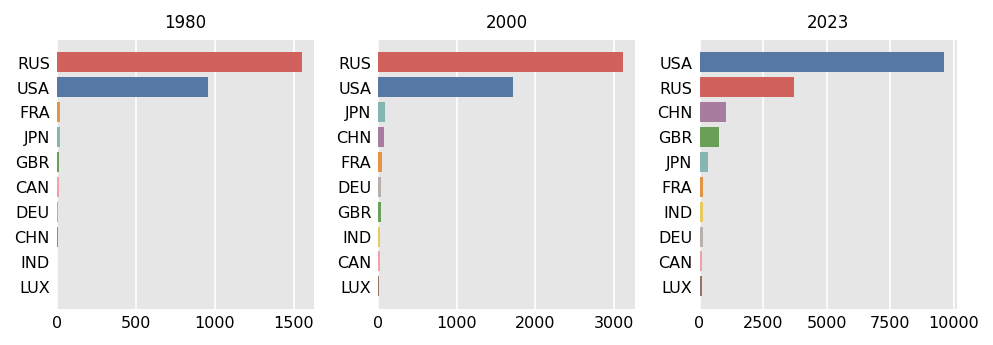

In [188]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)

years = [1980, 2000, 2023]
for ax, year in zip(ax_array, years):
    dfss = df_selected.loc[year]
    xv = df_selected.loc[year]
    yv = df_selected.loc[year].rank(method='first')
    ax.barh(y=yv, width=xv.values, color=tableau10, tick_label=xv.index)
    ax.set_title(year, fontsize='smaller')
    nice_axes(ax)

Smoothly transition between 2011 and 2020

In [190]:
anim_df = df_selected.loc[2011:2023]
anim_df.head(2)

code,USA,FRA,RUS,JPN,GBR,IND,CHN,CAN,LUX,DEU
year,,,,,,,,,,
2011,2056.0,90.0,3360.0,160.0,54.0,63.0,203.0,42.0,21.0,64.0
2012,2089.0,95.0,3383.0,169.0,58.0,65.0,229.0,44.0,23.0,65.0


Reindexing and updating  indices

In [191]:
anim_df   = anim_df.reset_index()
anim_df.index = anim_df.index * 5
anim_df.head()

code,year,USA,FRA,RUS,JPN,GBR,IND,CHN,CAN,LUX,DEU
0,2011,2056.0,90.0,3360.0,160.0,54.0,63.0,203.0,42.0,21.0,64.0
5,2012,2089.0,95.0,3383.0,169.0,58.0,65.0,229.0,44.0,23.0,65.0
10,2013,2169.0,103.0,3412.0,174.0,65.0,70.0,248.0,48.0,24.0,71.0
15,2014,2264.0,105.0,3447.0,198.0,75.0,74.0,273.0,52.0,26.0,72.0
20,2015,2368.0,105.0,3474.0,202.0,82.0,78.0,311.0,54.0,26.0,72.0


Expand DataFrame with reindex: Inserting empty   rows after reindexing

In [192]:
last_idx = anim_df.index[-1] + 1
df_expanded = anim_df.reindex(range(last_idx))
df_expanded.head(3)

code,year,USA,FRA,RUS,JPN,GBR,IND,CHN,CAN,LUX,DEU
0,2011.0,2056.0,90.0,3360.0,160.0,54.0,63.0,203.0,42.0,21.0,64.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df_expanded['year'] = df_expanded['year'].fillna(method='ffill')
df_expanded = df_expanded.set_index('year')
df_expanded.head(3)

code,USA,FRA,RUS,JPN,GBR,IND,CHN,CAN,LUX,DEU
year,,,,,,,,,,
2011.0,2056.0,90.0,3360.0,160.0,54.0,63.0,203.0,42.0,21.0,64.0
2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rank countries within each  row

In [194]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded.head(3)

code,USA,FRA,RUS,JPN,GBR,IND,CHN,CAN,LUX,DEU
year,,,,,,,,,,
2011.0,9.0,6.0,10.0,7.0,3.0,4.0,8.0,2.0,1.0,5.0
2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Linear interpolate missing values

In [195]:
df_expanded = df_expanded.interpolate()
df_expanded.head(3)

code,USA,FRA,RUS,JPN,GBR,IND,CHN,CAN,LUX,DEU
year,,,,,,,,,,
2011.0,2056.0,90.0,3360.0,160.0,54.0,63.0,203.0,42.0,21.0,64.0
2011.0,2062.6,91.0,3364.6,161.8,54.8,63.4,208.2,42.4,21.4,64.2
2011.0,2069.2,92.0,3369.2,163.6,55.6,63.8,213.4,42.8,21.8,64.4


In [197]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded.head(3)

code,USA,FRA,RUS,JPN,GBR,IND,CHN,CAN,LUX,DEU
year,,,,,,,,,,
2011.0,9.0,6.0,10.0,7.0,3.0,4.0,8.0,2.0,1.0,5.0
2011.0,9.0,6.0,10.0,7.0,3.0,4.0,8.0,2.0,1.0,5.0
2011.0,9.0,6.0,10.0,7.0,3.0,4.0,8.0,2.0,1.0,5.0


Plot each step of the transition

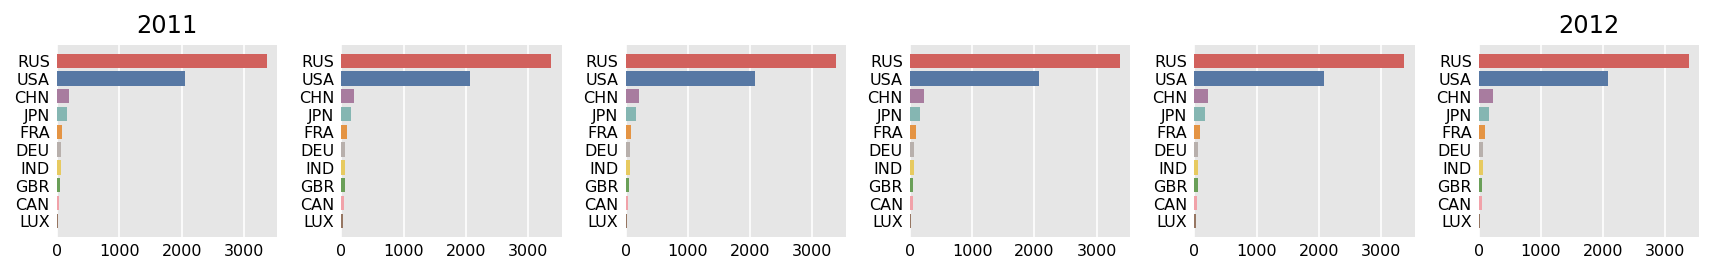

In [207]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2),  dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=tableau10, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2011')
ax_array[-1].set_title('2012');

Animation: `FuncAnimation`

In [211]:
def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)


In [212]:
def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=tableau10, tick_label=labels)
    year_str = '{:.0f}'.format(df_expanded.index[i])
    ax.set_title(f'Space Launch By  Country - {year_str}', fontsize='smaller')

In [205]:
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), interval=100, repeat=False)

Return animation HTML: 

In [214]:
html = anim.to_html5_video()
HTML(html)

Save the animation to disk as an mp4

In [276]:
#pwd()

In [135]:
#anim.save('launch_2011_2020.mp4')

Wrapping up: function to prepare all of the data

In [216]:

def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['year'] = df_expanded['year'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('year')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

In [217]:
dfe, dfr = prepare_data(df_selected)
dfe.head(3)

code,USA,FRA,RUS,JPN,GBR,IND,CHN,CAN,LUX,DEU
year,,,,,,,,,,
1957.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957.0,1.4,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957.0,2.8,0.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
def update_full(i):
    for bar in ax.containers:
        bar.remove()
    y = dfr.iloc[i]
    width = dfe.iloc[i]
    ax.barh(y=y, width=width, color=tableau10, tick_label=labels)
    year_str = '{:.0f}'.format(dfe.index[i])
    ax.set_title(f'Space Launch By  Country - {year_str}', fontsize='smaller')

In [219]:
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim_full = FuncAnimation(fig=fig, func=update_full, init_func=init, frames=len(dfe), interval=100, repeat=False)

In [220]:
html = anim_full.to_html5_video()
HTML(html)

## bar_chart_race

### Setup for bcr

[ffmpeg](https://trac.ffmpeg.org/wiki/CompilationGuide/macOS#ffmpegthroughHomebrew)

[download](https://www.ffmpeg.org/download.html#build-mac)

### Warnings

In [270]:
import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore', category=UserWarning) 

In [3]:
df = bcr.load_dataset('covid19_tutorial')
df.head()

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943
2020-04-06,1632,3335,8926,1810,3739,16523,1874,13341,10783,5385
2020-04-07,2035,3335,10343,2016,3872,17127,2108,14045,12798,6171


In [271]:
bar1  = bcr.bar_chart_race(df=df, filename=None)
bar1

**Hidded warnings**

.../.pvenv/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)

.../.pvenv/lib/python3.11/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))

.../.pvenv/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(

In [272]:
bar2  = bcr.bar_chart_race(
    df=df_selected, 
    filename=None)
bar2

### Customization

In [275]:
bar3  = bcr.bar_chart_race(
    df=df_selected, 
    filename=None,
    period_length=500,
    fixed_max=True, 
    fixed_order=False, 
    n_bars=10,
    figsize=(5, 3), 
    period_fmt='Year: {x:.0f}',
    cmap='accent', 
    filter_column_colors=True,    # if #bar < #color palettes
    title='OBJECTS LAUNCHED INTO SPACE\nTotal launched: Top 10 countries  by year',
    title_size = 14, 
    bar_label_size  = 12
    )
bar3


### Saving

In [280]:
bcr.bar_chart_race(
    df=df_selected, 
    filename= 'launch_1957_2023.mp4',
    period_length=500,
    fixed_max=True, 
    fixed_order=False, 
    n_bars=10,
    figsize=(5, 3), 
    period_fmt='Year: {x:.0f}',
    cmap='accent', 
    filter_column_colors=True,    # if #bar < #color palettes
    title='OBJECTS LAUNCHED INTO SPACE\nTotal launched: Top 10 countries  by year',
    title_size = 14, 
    bar_label_size  = 12
    )

Using All countries

In [274]:

bar4  = bcr.bar_chart_race(
    df=df_cumsum, 
    filename=None,
    period_length=500,
    fixed_max=True, 
    fixed_order=False, 
    n_bars=20,
    figsize=(5, 3), 
    period_fmt='Year: {x:.0f}',
    title='OBJECTS LAUNCHED INTO SPACE\nTotal launched: Top 20 countries  by year',
    bar_label_size=4, tick_label_size=5,
    title_size='smaller',
    shared_fontdict={'family': 'Roboto', 'weight': 'bold',  'color': 'red'}
    )
bar4